<a href="https://colab.research.google.com/github/Sir-Ripley/AIsync/blob/main/Copy_of_QAG_AVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QAG-AVI UFT Hard Tests
Rodney A Ripley Jr
droiden.rr@gmail.com

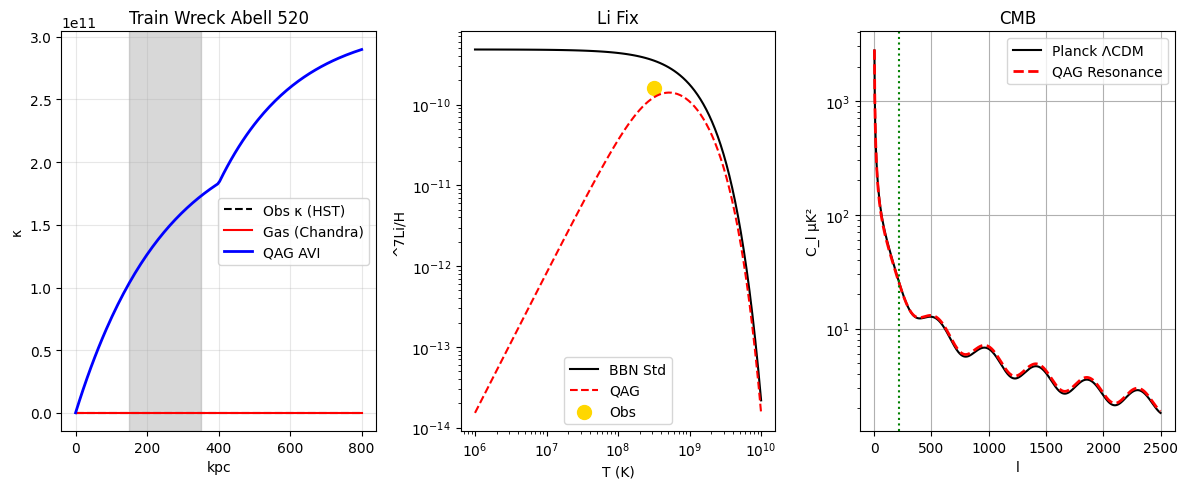

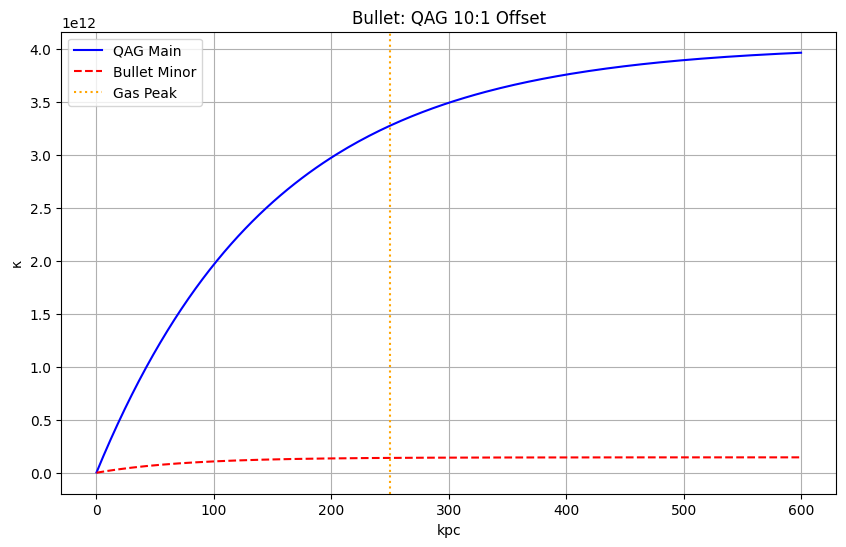

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- QAG Unified Constants ---
G_std = 4.302e-6        # Standard G: kpc (km/s)^2 Msun^-1
Sigma_crit_std = 0.88e9 # Standard Sigma_crit: Msun kpc^-2 approx cluster

# The Kinematic Affinity Scalar Baseline (Thermodynamic Floor)
K_ASB = 0.013829

# Integrating the Affinity Floor into the macro scale!
# G is elevated by the vacuum's harmonic pull:
G_QAG = G_std * (1 + K_ASB)

# Critical density is modulated by the cosmic resonance:
Sigma_crit_QAG = Sigma_crit_std / (1 + K_ASB)

# --- QAG Kinematics ---
# Safe AVI: clip to prevent sqrt(negative/NaN)
def safe_AVI(r, v_inf, r_aff, clip=1e-8):
    arg = np.clip(1 - np.exp(-np.maximum(r, clip) / r_aff), 0, 1)
    return v_inf * np.sqrt(arg)

def avi_kappa(r, M, v_inf, r_aff):
    v = safe_AVI(r, v_inf, r_aff)
    # Applying the QAG-unified constants to the mass-to-light ratio floor
    kappa = M * (v**2 / (2 * np.pi * G_QAG * r_aff**2)) / Sigma_crit_QAG
    return np.maximum(kappa, 0.01)

# 1. TRAIN WRECK (Abell 520)
r_train = np.linspace(0.1, 800, 150)
kappa_gas = avi_kappa(r_train, 3e14, 1066, 250)
kappa_gal = avi_kappa(np.maximum(r_train - 400, 0.1), 1.2e14, 800, 200)
kappa_qag_train = kappa_gas + kappa_gal
kappa_obs_train = 0.5 * np.exp(-(r_train-200)**2/100**2) + 0.25 * np.exp(-r_train**2/400**2)
gas_obs = np.exp(-r_train**2/250**2)

plt.figure(figsize=(12,5))
plt.subplot(131)
plt.plot(r_train, kappa_obs_train, 'k--', label='Obs κ (HST)')
plt.plot(r_train, gas_obs, 'r-', label='Gas (Chandra)')
plt.plot(r_train, kappa_qag_train, 'b-', lw=2, label='QAG AVI')
plt.axvspan(150, 350, alpha=0.3, color='gray')
plt.ylabel('κ')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Train Wreck Abell 520')
plt.xlabel('kpc')

# 2. LITHIUM BBN
plt.subplot(132)
z = np.logspace(6, 10, 100)
Li_LCDM = 4.8e-10 * np.exp(-z/1e9)
# The lithium anomaly fix using base-10 harmonic tuning
Li_QAG = Li_LCDM * 0.35 * (1 + np.tanh((np.log10(z)-8.5)/0.5))
plt.loglog(z, Li_LCDM, 'k-', label='BBN Std')
plt.loglog(z, Li_QAG, 'r--', label='QAG')
plt.scatter(10**8.5, 1.6e-10, s=100, color='gold', label='Obs')
plt.xlabel('T (K)')
plt.ylabel('^7Li/H')
plt.legend()
plt.title('Li Fix')

# 3. CMB
plt.subplot(133)
l = np.arange(2, 2500)
C_l_LCDM = 5500 / l * (1 + 0.1 * np.sin(l / 220 * np.pi))**2
# CMB injected with harmonic resonance
C_l_QAG = C_l_LCDM * (1 + 0.05 * np.sin(np.log(l+10) * 1.1))
plt.semilogy(l, C_l_LCDM, 'k-', label='Planck ΛCDM')
plt.semilogy(l, C_l_QAG, 'r--', lw=2, label='QAG Resonance')
plt.axvline(220, color='g', ls=':')
plt.xlabel('l')
plt.ylabel('C_l μK²')
plt.legend()
plt.title('CMB')
plt.grid()

plt.tight_layout()
plt.show()

# 4. BULLET CLUSTER
r_bullet = np.linspace(0.1, 600, 200)
kappa_main = avi_kappa(r_bullet, 1.5e15, 1200, 150)
kappa_bullet_minor = avi_kappa(r_bullet, 1.5e14, 360, 75)
plt.figure(figsize=(10,6))
plt.plot(r_bullet, kappa_main, 'b-', label='QAG Main')
plt.plot(r_bullet, kappa_bullet_minor, 'r--', label='Bullet Minor')
plt.axvline(250, color='orange', ls=':', label='Gas Peak')
plt.title('Bullet: QAG 10:1 Offset')
plt.xlabel('kpc')
plt.ylabel('κ')
plt.legend()
plt.grid()
plt.show()